Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



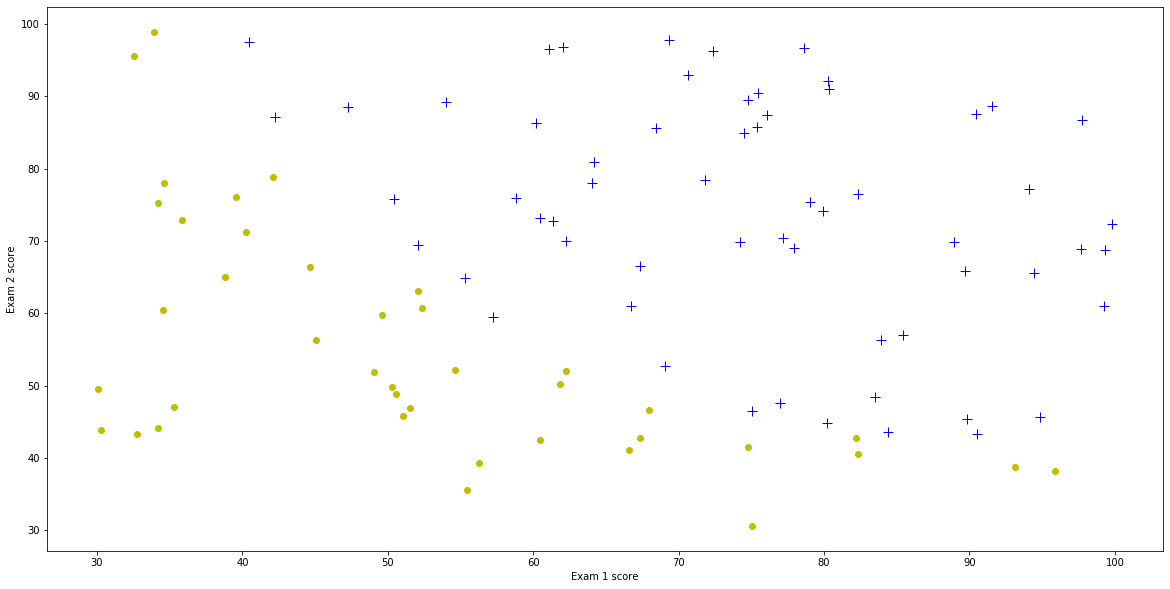

Cost at initial theta (zeros): 0.6931471805599457

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.21833019382659774
Expected cost (approx): 0.218

Gradient at test theta: 

[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



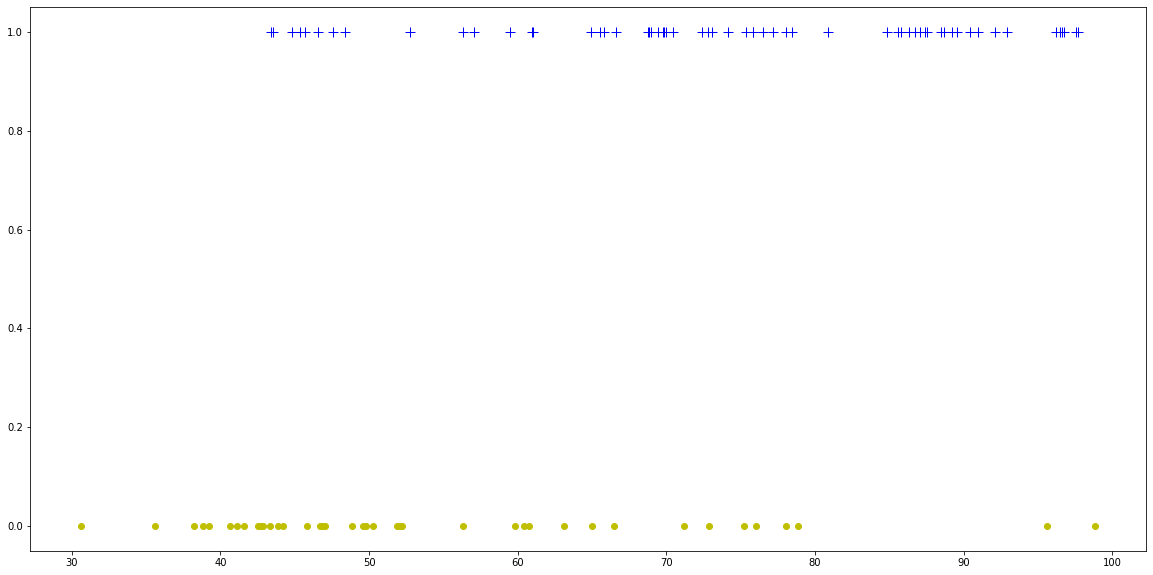

In [34]:
%matplotlib inline
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def sigmoid(z):
    g = np.zeros((z.shape[0],1))
    g=1/(1+np.exp(-z))
    return g

def costfunc(X, y, theta):
    J = 0
    h=np.dot(X,theta)
    J=(((np.multiply((y*(-1)),np.log(sigmoid(h))))+(np.multiply(((-1)*(1.-y)),np.log(1-sigmoid(h)))))/m).sum(axis=0)
    return J

def gradient(X, y, theta):
    grad = np.zeros((initial_theta.shape[0], 1))
    h=np.dot(X,theta)
    grad=np.dot(X.T,(sigmoid(h)-y))/m
    return grad

data = np.loadtxt("ex2data1.txt", delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')

pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

[m, n] = X.shape
X = np.concatenate((np.ones((m,1)),X),axis=1)

initial_theta = np.zeros(n+1)
J=costfunc(X, y, initial_theta)
grad=gradient(X, y, initial_theta)

print('Cost at initial theta (zeros):', J)
print('\nExpected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

test_theta = np.array([-24, 0.2, 0.2])
J=costfunc(X, y, test_theta)
grad=gradient(X, y, test_theta)

print('Cost at test theta:', J)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


X=X[:,1:3]
pos=np.where(y==1)
neg=np.where(y==0)
plt.plot(X[pos, 0], X[pos, 1], 'b+', markersize=10)
plt.plot(X[neg, 0], X[neg, 1], 'yo', markersize=6)


In [ ]:
print